# 함수형 모델 (일대다)
* 1개의 컬럼이 입력되어 여러개의 컬럼으로 출력되는 경우 
* Input과 Output의 shape만 조절하면 가능

## 0 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import random

from sklearn.model_selection import train_test_split  # 데이터 분리를 위해 사용 

## 1. 데이터셋 생성하기
* 2행 100 열로 된 데이터 --> 100행에 2열 데이터로 변환 
* 학습 데이터 
* __검증 데이터__
* 테스트 데이터
* 사이킷 런에 잘 구현된 __train_test_split 함수__ 를 이용해서 데이터를 효율적으로 잘라냄 
    - test_size=0.4 : 테스트 사이즈가 40%라는 의미 (train : 60%, test : 40%)
    - suffle : 데이터를 섞을 것인지 선택 - 일반적으로 shuffule을 사용하면 결과가 더 좋음 
* train : val : test - 6:2:2 로 설정  

In [2]:
x = np.array(range(100))
y = np.array([range(201, 301), range(301, 401)])

x = np.transpose(x)
y = np.transpose(y)

print(x.shape)
print(y.shape)

# 학습 데이터와 테스트 데이터 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.4, shuffle=False)

# 검증 데이터와 테스트 데이터 분리하기 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=66, test_size=0.5)

(100,)
(100, 2)


## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [3]:
model = Sequential()

model.add(Dense(5, input_shape = (1, ), activation ='relu'))
model.add(Dense(3))
model.add(Dense(4))
model.add(Dense(2))  # 출력 2

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [4]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [12]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_val, y_val))

Train on 60 samples, validate on 20 samples
Epoch 1/100
60/60 [==============================] - 0s 2ms/sample - loss: 2.9285 - mse: 2.9285 - val_loss: 19.5822 - val_mse: 19.5822
Epoch 2/100
60/60 [==============================] - 0s 2ms/sample - loss: 2.4529 - mse: 2.4529 - val_loss: 22.3851 - val_mse: 22.3851
Epoch 3/100
60/60 [==============================] - 0s 2ms/sample - loss: 2.3482 - mse: 2.3482 - val_loss: 15.7636 - val_mse: 15.7636
Epoch 4/100
60/60 [==============================] - 0s 2ms/sample - loss: 1.9423 - mse: 1.9423 - val_loss: 21.6678 - val_mse: 21.6678
Epoch 5/100
60/60 [==============================] - 0s 2ms/sample - loss: 1.8771 - mse: 1.8771 - val_loss: 13.4409 - val_mse: 13.4409
Epoch 6/100
60/60 [==============================] - 0s 2ms/sample - loss: 1.6127 - mse: 1.6127 - val_loss: 11.4858 - val_mse: 11.4858
Epoch 7/100
60/60 [==============================] - 0s 2ms/sample - loss: 1.4542 - mse: 1.4542 - val_loss: 8.4676 - val_mse: 8.4676
Epoch 8/100
6

60/60 [==============================] - 0s 2ms/sample - loss: 0.0125 - mse: 0.0125 - val_loss: 45.2449 - val_mse: 45.2449
Epoch 61/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.1358 - mse: 0.1358 - val_loss: 41.5844 - val_mse: 41.5844
Epoch 62/100
60/60 [==============================] - 0s 2ms/sample - loss: 1.1694 - mse: 1.1694 - val_loss: 45.1881 - val_mse: 45.1881
Epoch 63/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.1797 - mse: 0.1797 - val_loss: 43.2244 - val_mse: 43.2244
Epoch 64/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0224 - mse: 0.0224 - val_loss: 44.9433 - val_mse: 44.9433
Epoch 65/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.1861 - mse: 0.1861 - val_loss: 59.4258 - val_mse: 59.4258
Epoch 66/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.2542 - mse: 0.2542 - val_loss: 46.6436 - val_mse: 46.6436
Epoch 67/100
60/60 [==============================] - 0s 2ms/

## 5. 학습과정 살펴보기

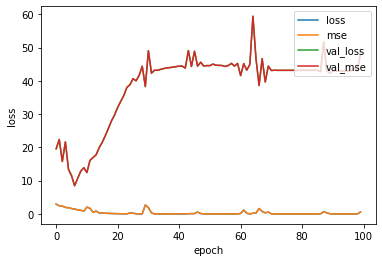

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [14]:
loss, mse = model.evaluate(x_test, y_test, batch_size =1)
print("loss : ", loss)
print("mse : ", mse )

20/20 [==============================] - 0s 2ms/sample - loss: 53.5956 - mse: 53.5956
loss :  53.595569217205046
mse :  53.59557


## 7. 예측하기 

In [15]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

결과물 : 
 [[265.99323 366.4087 ]
 [281.32214 381.88934]
 [295.84015 398.2709 ]
 [267.01517 367.44077]
 [262.92746 363.3126 ]
 [306.88995 412.5478 ]
 [264.97128 365.37668]
 [291.42023 392.56015]
 [298.0501  401.12628]
 [315.72977 423.9693 ]
 [300.26004 403.98166]
 [287.45367 388.0816 ]
 [286.43176 387.04956]
 [279.27832 379.8253 ]
 [271.10287 371.56894]
 [276.2125  376.72913]
 [270.08093 370.5369 ]
 [274.16864 374.66504]
 [285.40982 386.0175 ]
 [309.09988 415.40314]]


#### RMSE 구하기
* __평균 제곱근 오차 - RMSE(Root Mean Squared Error)__ 
    - 회귀 분석을 평가할 때 가장 많이 사용하는 지표 중에 하나
    - MSE에 루트를 사용
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것
    - RMSE는 낮을수록 정밀도가 높음

In [16]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  7.320899458580939


#### R2 구하기
* __결정 계수(R2)__
    - 회귀 분석에서 많이 사용하는 지표 중에 하나
    - RMSE와 반대로 높을수록 좋은 지표
    - 0~1사이의 수치 - 0.73 정도의 값이 나오면 73%의 설명력을 가진다고 해석 
    - 사이킷런에서 r2_score 함수로 제공 
    - 만약 R2의 값이 음수가 나오면 학습 시 머신에 뭔가 잘못된 부분이 존재한다는 의미 

In [17]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.6206630531175745


#### 새로운 데이터로 예측 수행하기 
* x_predict에 새로운 값을 설정한 후 y_predict 값을 출력한다. 

In [18]:
x_predict = np.array(range(411, 421))
x_predict = np.transpose(x_predict)    # 입력 가능한 형태로 변환 
print(x_predict.shape)
y_predict = model.predict(x_predict)
print(y_predict)

(10,)
[[1005.23737 1314.8472 ]
 [1007.4474  1317.7026 ]
 [1009.6572  1320.5579 ]
 [1011.8673  1323.4133 ]
 [1014.0772  1326.2686 ]
 [1016.28723 1329.124  ]
 [1018.49713 1331.9795 ]
 [1020.70703 1334.8347 ]
 [1022.917   1337.6902 ]
 [1025.1271  1340.5457 ]]
